# Steady-state conduction in a lengthwise-insulated rod with internal heat production

In this notebook we present the code behind [heat transfer in a rod tutorial](https://github.com/camillejr/fluid-dynamics-and-transport-phenomena/blob/master/transport-phenomena-with-Python/example-heat-transfer-in-a-rod.pdf).

We compute the analytic solution and then compare that with few numerical solutions of the governing ODE.

***

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

# Set some initial parameters:
fontsize_labels = 20
fontsize_axes = 16
fontsize_text = 16
save_plots = True
line_color = '#0e2f44'
bar_color = '#767676'
help_lines = "#e5e5e5"

# Fonts:
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}

***

## Analytic solution

We begin with plotting the analytic solution.

First, let's set the data for this exercise:

In [2]:
T0 = 0 # deg C
L = 200 # m
Q = 20 # W
𝝀 = 400 # W/(m*C)

# Discretize the rod:
n_points = 200
x = np.linspace(0, L, n_points)

# Analytic solution:
T = - Q/(2*𝝀) * (x**2 - L * x) + T0

Plot the analytic solution:

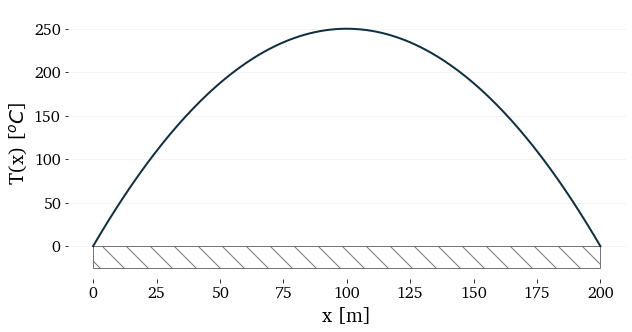

In [3]:
figure = plt.figure(figsize=(10, 5))
ax1 = figure.add_subplot(1,1,1)
plt.xlabel(r'x [m]', fontsize=fontsize_labels, **csfont)
plt.ylabel(r'T(x) [$^o C$]', fontsize=fontsize_labels, **csfont)
plt.xlim(-0.05*L, 1.05*L)
plt.ylim(-0.15*max(T), 1.1*max(T))
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.margins(x=0)
plt.rcParams['axes.xmargin'] = 0

ax1.add_patch(
    patches.Rectangle(
        (0, -0.1*max(T)),
        L,
        0.1*max(T),
        Fill=False,
        edgecolor=bar_color,
        linewidth=1,
        hatch='\\'
    )
)

for label in (ax1.get_xticklabels()):
    label.set_fontname('Charter')
    label.set_fontweight('regular')
    label.set_fontsize(fontsize_axes)

for label in (ax1.get_yticklabels()):
    label.set_fontname('Charter')
    label.set_fontweight('regular')
    label.set_fontsize(fontsize_axes)

plt.plot(x, T, color=line_color, linestyle='-', linewidth=2.0, zorder=1)
for y in np.arange(min(T), 1.1*max(T), 50):
    plt.plot([-0.05*L, 1.05*L], [y, y], "-", lw=1, color=help_lines, zorder=-1, alpha=0.4)

if save_plots==True: plt.savefig('../plots/example-heat-transfer-in-a-rod-analytic.png', dpi = 500, bbox_inches='tight')